In [1]:
import pandas as pd
import numpy as np
from urllib.request import urlopen
import bs4 
import re
from pyxdameraulevenshtein import damerau_levenshtein_distance, normalized_damerau_levenshtein_distance
%matplotlib inline


In [2]:
# a = pd.read_csv('/Users/wcasey/Documents/transactions.csv')
a = pd.read_excel('/Users/wcasey/Desktop/transactions.xls')
a = a.drop(['accountNumber', 'mutationcode', 'valuedate', 'endsaldo', 'startsaldo'], axis=1)
a['transactiondate'] = pd.to_datetime(a['transactiondate'].astype('str'))
# a = a[a['transactiondate'] >= '2017-10-01']

In [3]:
site = 'https://en.wikipedia.org/wiki/List_of_cities_in_the_Netherlands_by_province'
page = urlopen(site)
soup = bs4.BeautifulSoup(page, 'html.parser')
ul_list = soup.find_all('ul')[2:14]

CITIES_NL = []
for u in ul_list:
    for word in u.find_all('li'):
        CITIES_NL.append(word.text.lower())

for word in ['ams' 'schipol']:
    CITIES_NL.append(word)
# CITIES_NL

In [4]:
print(min(a['transactiondate']))
print(max(a['transactiondate']))

2017-09-01 00:00:00
2018-11-14 00:00:00


In [5]:
# budget = pd.DataFrame({'cateogry': ['phone', 'food', 'groceries', 'health_insurance', 'internet','energy_bill', 'rent', 'tithe', 'water_bill', 'misc_shopping', 'other_expenses', 'transportation', 'travel', 'savings_account', 'house_cleaner'],
#                        'group': ['bills', 'food', 'groceries', 'bills', 'bills', 'bills', 'rent', 'bills', 'bills', 'shopping/entertainment', 'other', 'transportation', 'travel', 'savings', 'bills'],
#                        'budget_amount': [100, 110, 800, 240, 50, 77, 1950, 380, 38, 0, 0, 0, 0,  500, 140]
  
# })

In [6]:
budget = pd.read_excel('budget.xlsx')

In [7]:
!ls

abn_amro.py                 budget.xlsx
bank_account_analysis.ipynb


In [8]:
budget

category   amount        group
0                      phone    87.00        bills
1              house_cleaner   140.00        bills
2   Credit Card: Capital One     0.00  credit_card
3                       food   110.00         food
4                  groceries   800.00    groceries
5                        gym   100.00        bills
6           health_insurance   240.00        bills
7                   internet    54.49        bills
8                energy_bill   189.00        bills
9                       rent  1964.00         rent
10                     tithe   379.70        bills
11                water_bill    80.82        bills

In [9]:
budget.amount.sum()

4145.0099999999993

In [10]:
# %matplotlib inline
# a[['transactiondate', 'startsaldo']].plot(kind='line', x='transactiondate', figsize= (20,10))

In [11]:

def exp_inc(amount):
    if amount < 0:
        return "expense"
    else:
        return "income"

def reverse_sign(amount):
    if amount < 0:
        return amount*-1
    else:
        return amount

def get_date_time(description):
    if 'bea' in description:
        return float(description.split()[2].split('/')[1])
    else:
        return 0

def cities(description):
    for word in re.split(r'[,\s]+', description)[3:]:
        if word in CITIES_NL:
            if word == 'ams':
                return 'amsterdam'
            else:
                return word
    return None
    


a['exp_inc'] = a['amount'].apply(exp_inc)
a['amount'] = a['amount'].apply(reverse_sign)
a['year_month'] = a.transactiondate.dt.to_period('M')
a['description'] = a['description'].apply(lambda x: x.lower())
a['paid_in_person'] = a['description'].str.contains(('bea').lower()).astype('int')
a['paid_online'] = a['description'].str.contains(('sepa').lower()).astype('int')
a['paid_ideal'] = a['description'].str.contains(('ideal').lower()).astype('int')
a['cash_withdrawal'] = a['description'].str.contains(('gea').lower()).astype('int')
a['transaction_time'] = a['description'].apply(get_date_time)
a['transaction_time_hour'] = a['transaction_time'].round()
a['day_of_week'] = a['transactiondate'].apply(lambda x: x.weekday())
a['month'] = a['transactiondate'].apply(lambda x: x.month)
a['city'] = a['description'].apply(cities)

In [12]:
categories= {'NL91ABNA0247286842': 'savings_account',
              'NL77INGB0006147561': 'rent', #baarn rent
             'nl95abna0425995593': 'rent', #haarlem rent
             'NL37DEUT0265134285': 'will_income',
             'nl36ingb0003445588': 'will_income', #tax return
             'nl06deut0265131545': 'will_income',
             'transferwise': 'transfer_wise',
              'Albert Heijn' : 'groceries',
              'vomar': 'groceries',
              'Coop': 'groceries',
              'Jumbo': 'groceries',
             ' V.O.F.': 'groceries',
             'VOF': 'groceries',
             'Marqt': 'groceries',
             'land:': 'travel',
             'Booking Prins&Keizer': 'food',
             "McDonald's": 'food',
             'Mcdonalds': 'food',
             'KFC': 'food',
             'Bakker Bart': 'food',
             'Broodzaak' : 'food',
             'NYPizza': 'food',
             'Kiosk': 'food',
             'AH to Go': 'food',
             'AH togo': 'food',
             '4 Seasons': 'food',
             'VAP': 'food',
             'BRN SHK BAARN': 'food',
             'smullers': 'food',
             'De Smaecken': 'food',
             'bakker Simon Meyssen': 'food',
             'Booking': 'food',
             'Starbucks': 'food',
             'Golden CoffeeBox': 'food',
             'Uniek': 'food',
             'La Regina': 'food',
             'salsa': 'food',
             "rene's": 'food',
             'Van Kooy Tweewiele': 'bike_expenses',
             'Bike Totaal': 'bike_expenses',
             'Nuon Klantenservice': 'energy_bill',
             'Kruidvat': 'misc_shopping',
             'Etos': 'misc_shopping',
             'Blokker': 'misc_shopping',
             'HEMA': 'misc_shopping',
             'AMAZON': 'misc_shopping',
             'bol.com': 'misc_shopping',
             'xenos': 'misc_shopping',
             'coolblue': 'misc_shopping',
             'Nijhof': 'misc_shopping',
             'trekpleister': 'misc_shopping',
             'toys': 'toys',
             'TunFun': 'entertainment',
             'Canal': 'entertainment',
             'De Efteling': 'entertainment',
             'artis': 'entertainment',
             'ziggo': 'internet',
             'int card services': 'credit_card_bill',
             'NL08ABNA0526650664': 'credit_card_bill',
             'DE9370011110400360': 'transfer_wise',
             'EE297700771000701243': 'transfer_wise',
             'gea': 'atm_cash_withdrawal',
             'LAANSTRAAT 36A': 'atm_cash_withdrawal',
             'EEMNESSERWEG': 'atm_cash_withdrawal',
             'geldautomaat': 'atm_cash_withdrawal',
             'salzstr': 'atm_cash_withdrawal',
             'ceintuurbaan': 'atm_cash_withdrawal',
             'NL18ZZZ410952220000': 'health_insurance',
             'H&M': 'clothing',
             'HM': 'clothing',
             'PRIMARK': 'clothing',
             'ESSO': 'fuel',
             'ikea': 'ikea',
             'EasyPayExtra': 'bank_fees',
             'Dynafix': 'misc',
             'T-MOBILE': 'phone',
             'NS-': 'train',
             'taxi': 'taxi',
             'vitens': 'water_bill',
             'baarn belastingen': 'taxes',
             'life fit': 'gym',
             'de buurtbakker': 'food',
             'thuisbezorgd': 'food',
             'mac-genius.nl': 'phone_repair',
             'action': 'misc_shopping',
             'het zwarte': 'bike_expenses',
             'www.svb.nl': 'child_benefit',
             'vividus participaties': 'transportation',
             'pwn waterleidingbedrijf': 'water_bill',
             'westergracht supermark': 'groceries'
    
       
}
group= {'NL91ABNA0247286842': 'savings_account',
              'NL77INGB0006147561': 'rent', #baarn rent
             'nl95abna0425995593': 'rent', #haarlem rent
             'NL37DEUT0265134285': 'will_income',
             'nl36ingb0003445588': 'will_income', #tax return
             'nl06deut0265131545': 'will_income',
             'transferwise': 'transfer_wise',
              'Albert Heijn' : 'groceries',
             'vomar': 'groceries',
              'Coop': 'groceries',
              'Jumbo': 'groceries',
             ' V.O.F.': 'groceries',
             'VOF': 'groceries',
             'Marqt': 'groceries',
             'land:': 'travel',
             'Booking Prins&Keizer': 'food',
             "McDonald's": 'food',
             'Mcdonalds': 'food',
             'KFC': 'food',
             'Bakker Bart': 'food',
             'Broodzaak' : 'food',
             'NYPizza': 'food',
             'Kiosk': 'food',
             'AH to Go': 'food',
             'AH togo': 'food',
             '4 Seasons': 'food',
             'VAP': 'food',
             'BRN SHK BAARN': 'food',
             'smullers': 'food',
             'De Smaecken': 'food',
             'bakker Simon Meyssen': 'food',
             'Booking': 'food',
             'Starbucks': 'food',
             'Golden CoffeeBox': 'food',
             'Uniek': 'food',
             'La Regina': 'food',
             'salsa': 'food',
             "rene's": 'food',
             'Van Kooy Tweewiele': 'other',
             'Bike Totaal': 'other',
             'Nuon Klantenservice': 'bills',
             'Kruidvat': 'shopping/entertainment',
             'Etos': 'shopping/entertainment',
             'Blokker': 'shopping/entertainment',
             'HEMA': 'shopping/entertainment',
             'AMAZON': 'shopping/entertainment',
             'bol.com': 'shopping/entertainment',
             'xenos': 'shopping/entertainment',
             'coolblue': 'shopping/entertainment',
             'Nijhof': 'shopping/entertainment',
             'trekpleister': 'shopping/entertainment',
             'toys': 'shopping/entertainment',
             'TunFun': 'shopping/entertainment',
             'Canal': 'shopping/entertainment',
             'De Efteling': 'shopping/entertainment',
             'artis': 'shopping/entertainment',
             'ziggo': 'bills',
             'int card services': 'credit_card_bill',
             'NL08ABNA0526650664': 'credit_card_bill',
             'DE9370011110400360': 'transfer_wise',
             'EE297700771000701243': 'transfer_wise',
             'gea': 'atm_cash_withdrawal',
             'NL18ZZZ410952220000': 'bills',
             'H&M': 'shopping/entertainment',
             'HM': 'shopping/entertainment',
             'PRIMARK': 'shopping/entertainment',
             'ESSO': 'other',
             'ikea': 'shopping/entertainment',
             'EasyPayExtra': 'bank_fees',
             'Dynafix': 'other',
             'T-MOBILE': 'bills',
             'NS-': 'transportation',
             'taxi': 'transportation',
             'vividus participaties': 'transportation',
             'vitens': 'bills',
             'baarn belastingen': 'other',
            'life fit': 'gym',
             'de buurtbakker': 'food',
            'thuisbezorgd': 'food',
            'mac-genius.nl': 'other',
            'action': 'shopping/entertainment',
            'het zwarte': 'other',
            'www.svb.nl': 'child_benefit',
            'pwn waterleidingbedrijf': 'bills',
            'westergracht supermark': 'groceries'
    
       
}


def get_categories(description):
    for key in categories:
        if key.lower() in description.lower():
            return categories[key]

    return 'unknown'

def get_groups(description):
    for key in group:
        if key.lower() in description.lower():
            return group[key]

    return 'unknown'



a['category'] = a['description'].apply(get_categories)
a['group'] = a['description'].apply(get_groups)
# b['month'] = b.index.month

In [13]:
# a[a['exp_inc'] == 'expense'].to_csv('transactions_.csv')

In [14]:
b = (
a[['transactiondate', 'amount', 'exp_inc']]
    .groupby(['transactiondate', 'exp_inc'])
    .sum()
    .reset_index()
    .pivot(index='transactiondate',columns='exp_inc', values='amount')
    .fillna(0)
)    


In [15]:
b

exp_inc          expense   income
transactiondate                  
2017-09-01        641.52     0.00
2017-09-02         61.78     0.00
2017-09-04          8.50     0.00
2017-09-05         26.96     0.00
2017-09-06        353.80     0.00
2017-09-07          1.50     0.00
2017-09-08        832.03     0.00
2017-09-09         56.37     0.00
2017-09-10        446.40     0.00
2017-09-11          1.69     0.00
2017-09-12        181.50     0.00
2017-09-13         23.50     0.00
2017-09-14          9.70     0.00
2017-09-15         44.36   143.15
2017-09-16         84.67     0.00
2017-09-17        502.37     0.00
2017-09-18        322.63     0.00
2017-09-19         53.08     0.00
2017-09-20          7.91     0.00
2017-09-21        532.06     0.00
2017-09-22         97.70     0.00
2017-09-23        211.98     0.00
2017-09-24        123.46     0.00
2017-09-25        148.25  3672.57
2017-09-26         20.80     0.00
2017-09-27         53.37     0.00
2017-09-28        208.94     0.00
2017-09-29        191.41     0.00
2017-09-30       1574.35     0.00
2017-10-01        170.36     0.00
...                  ...      ...
2018-10-12         24.05     0.00
2018-10-13         46.52     0.00
2018-10-14         33.35     0.00
2018-10-15         28.25     0.00
2018-10-16        105.68     0.00
2018-10-17         24.09     0.00
2018-10-18          3.70     0.00
2018-10-19         54.50     0.00
2018-10-20         19.11     0.00
2018-10-22          5.60     0.00
2018-10-23         41.40     0.00
2018-10-24         11.78     0.00
2018-10-25         44.45  4125.39
2018-10-26        341.54     0.00
2018-10-27        253.86     0.00
2018-10-29        162.60     0.00
2018-10-30        133.50     0.00
2018-10-31         43.33     0.00
2018-11-01       2488.96     0.00
2018-11-02        254.43     0.00
2018-11-03        129.43     0.00
2018-11-04         28.01     0.00
2018-11-06        323.17   150.00
2018-11-07         23.18     0.00
2018-11-08       1263.41  1595.62
2018-11-09         30.05     0.00
2018-11-10        123.43     0.00
2018-11-11         10.60     0.00
2018-11-12         53.05     0.00
2018-11-14        124.76   100.00

[423 rows x 2 columns]

In [16]:
# %matplotlib inline
# b.cumsum().plot(kind='line')

In [17]:
# b.head()

In [18]:
a.loc[1210, 'description']

'sepa overboeking                 iban: nl51bngh0285031414        bic: bnghnl2g                    naam: municipality of baarn'

In [19]:
a[a['category'] == 'unknown'].sort_values('amount', ascending=False)


transactiondate   amount  \
1704      2018-10-11  1699.09   
1801      2018-11-08  1595.62   
27        2017-09-10   430.00   
1269      2018-07-07   391.95   
1104      2018-05-31   207.60   
83        2017-09-21   195.00   
1309      2018-07-19   185.00   
31        2017-09-12   175.00   
1604      2018-09-13   150.00   
1383      2018-08-01   146.00   
1408      2018-08-06   118.00   
92        2017-09-23   106.78   
1627      2018-09-21   102.00   
1210      2018-06-25   100.00   
81        2017-09-21    99.00   
1792      2018-11-06    95.00   
1415      2018-08-07    94.75   
720       2018-03-02    90.00   
1794      2018-11-06    89.05   
378       2017-12-02    87.18   
1753      2018-10-29    83.60   
1208      2018-06-25    81.33   
1555      2018-09-03    81.00   
1769      2018-11-01    81.00   
1672      2018-10-04    73.67   
1103      2018-05-31    72.12   
872       2018-04-03    71.90   
604       2018-02-02    70.05   
438       2017-12-18    69.15   
1283      2018-07-12    65.40   
...              ...      ...   
603       2018-02-02     2.40   
1636      2018-09-22     2.25   
62        2017-09-18     2.20   
93        2017-09-23     2.20   
1337      2018-07-25     2.00   
1431      2018-08-09     2.00   
932       2018-04-17     2.00   
779       2018-03-17     2.00   
847       2018-03-28     1.80   
358       2017-11-29     1.80   
90        2017-09-22     1.75   
518       2018-01-06     1.75   
1150      2018-06-12     1.75   
1589      2018-09-09     1.50   
113       2017-09-25     1.25   
1587      2018-09-09     1.10   
127       2017-09-28     1.10   
119       2017-09-26     1.00   
120       2017-09-26     1.00   
1308      2018-07-19     1.00   
170       2017-10-07     1.00   
1586      2018-09-09     1.00   
1459      2018-08-12     0.70   
1122      2018-06-03     0.70   
1060      2018-05-21     0.70   
1434      2018-08-09     0.70   
133       2017-09-28     0.70   
786       2018-03-18     0.70   
1577      2018-09-07     0.70   
1559      2018-09-04     0.70   

                                            description  exp_inc year_month  \
1704  /trtp/sepa overboeking/iban/gb73trwi0099604231...   income    2018-10   
1801  /trtp/sepa overboeking/iban/gb73trwi0099604231...   income    2018-11   
27    sepa ideal                       iban: nl48rab...  expense    2017-09   
1269  sepa ideal                       iban: nl30abn...  expense    2018-07   
1104  sepa ideal                       iban: nl82deu...  expense    2018-05   
83    sepa ideal                       iban: nl51abn...  expense    2017-09   
1309  bea   nr:wln7y8   19.07.18/20.55 wild romance ...  expense    2018-07   
31    sepa ideal                       iban: nl48rab...  expense    2017-09   
1604  /trtp/ideal/iban/nl30abna0524590958/bic/abnanl...  expense    2018-09   
1383  sepa overboeking                 iban: nl78abn...  expense    2018-08   
1408  bea   nr:ct498116 06.08.18/19.55 mex.rest. pop...  expense    2018-08   
92    bea   nr:9f9j08   23.09.17/14.12 hap blaricum ...  expense    2017-09   
1627  /trtp/ideal/iban/nl56ingb0705005100/bic/ingbnl...  expense    2018-09   
1210  sepa overboeking                 iban: nl51bng...  expense    2018-06   
81    bea   nr:ct465185 21.09.17/17.36 ccv*prenatal ...  expense    2017-09   
1792  bea   nr:7qjp90   06.11.18/16.01 praktijk perm...  expense    2018-11   
1415  sepa ideal                       iban: nl23rab...  expense    2018-08   
720   bea   nr:88416101 02.03.18/15.46 iz *cakeaholi...  expense    2018-03   
1794  bea   nr:um5301   06.11.18/17.48 rijwielhandel...  expense    2018-11   
378   bea   nr:5rl93p   02.12.17/16.21 tc overvecht ...  expense    2017-12   
1753  /trtp/sepa overboeking/iban/nl51bngh0285031414...  expense    2018-10   
1208  sepa ideal                       iban: nl59abn...  expense    2018-06   
1555  /trtp/ideal/iban/nl51abna0565668625/bic/abnanl...  expense    2018-09   
1769  bea   nr:k779zt   01.11.18/19.03 amsterdam dan...  expen

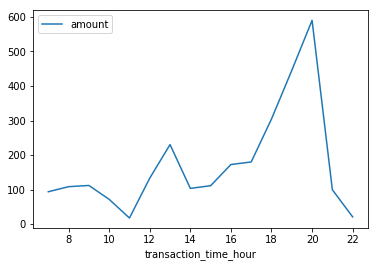

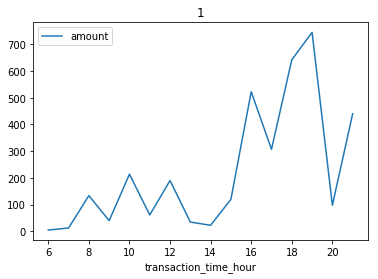

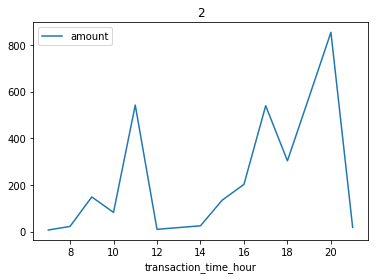

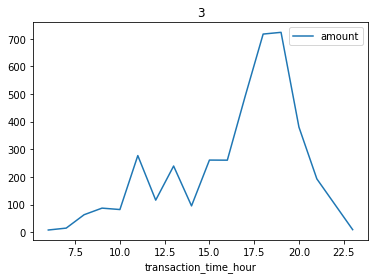

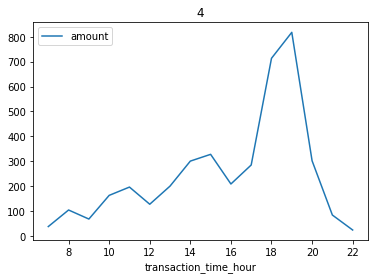

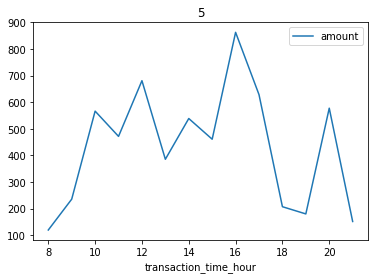

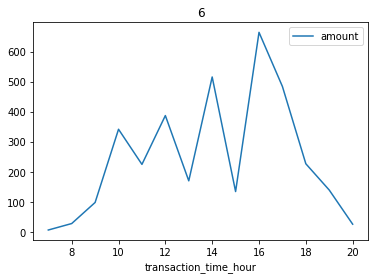

In [20]:
day_hour = a[a['paid_in_person'] == 1][['amount', 'transaction_time_hour', 'day_of_week' ]].groupby(['transaction_time_hour', 'day_of_week']).sum().reset_index()
for i in range(7):
    day_hour[day_hour['day_of_week'] == i][['transaction_time_hour', 'amount']].plot(kind='line', x='transaction_time_hour', y='amount', title=i)

In [21]:
a[a['category'] == 'phone'].groupby('year_month').amount.sum()

year_month
2017-09    114.65
2017-10     73.92
2017-11    163.26
2017-12    111.95
2018-01    105.13
2018-02     42.34
2018-03    102.36
2018-04     70.95
2018-05    249.55
2018-06    109.97
2018-07    108.46
2018-08    110.21
2018-09    111.49
2018-10    104.40
Freq: M, Name: amount, dtype: float64

In [22]:
a[a['category'] == 'phone']

transactiondate  amount  \
64        2017-09-18    0.01   
65        2017-09-18   24.99   
124       2017-09-28   29.65   
134       2017-09-29   60.00   
254       2017-10-27   32.47   
279       2017-10-31   41.45   
320       2017-11-10    4.24   
350       2017-11-27   10.95   
356       2017-11-29  100.79   
357       2017-11-29   47.28   
464       2017-12-23   10.00   
485       2017-12-27   10.95   
489       2017-12-28   30.00   
490       2017-12-28   61.00   
569       2018-01-25   10.95   
588       2018-01-30   32.41   
589       2018-01-30   61.77   
681       2018-02-23   10.95   
698       2018-02-28   31.39   
709       2018-03-02   60.02   
809       2018-03-23   10.95   
846       2018-03-28   31.39   
870       2018-04-03   60.00   
957       2018-04-24   10.95   
986       2018-05-02   33.68   
987       2018-05-02  115.55   
1076      2018-05-25   10.95   
1092      2018-05-29   30.37   
1100      2018-05-30   59.00   
1201      2018-06-25   10.95   
1215      2018-06-28   30.37   
1216      2018-06-28   68.65   
1327      2018-07-24   10.95   
1345      2018-07-27   33.42   
1368      2018-07-31   64.09   
1505      2018-08-23   10.95   
1521      2018-08-29   65.61   
1522      2018-08-29   33.65   
1643      2018-09-26   10.95   
1652      2018-09-28   31.12   
1653      2018-09-28   69.42   
1744      2018-10-25   10.95   
1755      2018-10-30   33.43   
1756      2018-10-30   60.02   

                                            description  exp_inc year_month  \
64    bea   nr:bs006589 18.09.17/16.47 ccv*t-mobile ...  expense    2017-09   
65    bea   nr:bs006589 18.09.17/16.54 ccv*t-mobile ...  expense    2017-09   
124   sepa incasso algemeen doorlopend incassant: nl...  expense    2017-09   
134   sepa incasso algemeen doorlopend incassant: nl...  expense    2017-09   
254   sepa incasso algemeen doorlopend incassant: nl...  expense    2017-10   
279   sepa incasso algemeen doorlopend incassant: nl...  expense    2017-10   
320   bea   nr:bs006609 10.11.17/15.05 ccv*t-mobile ...  expense    2017-11   
350   sepa incasso algemeen doorlopend incassant: nl...  expense    2017-11   
356   sepa incasso algemeen doorlopend incassant: nl...  expense    2017-11   
357   sepa incasso algemeen doorlopend incassant: nl...  expense    2017-11   
464   sepa ideal                       iban: nl19rab...  expense    2017-12   
485   sepa incasso algemeen doorlopend incassant: nl...  expense    2017-12   
489   sepa incasso algemeen doorlopend incassant: nl...  expense    2017-12   
490   sepa incasso algemeen doorlopend incassant: nl...  expense    2017-12   
569   sepa incasso algemeen doorlopend incassant: nl...  expense    2018-01   
588   sepa incasso algemeen doorlopend incassant: nl...  expense    2018-01   
589   sepa incasso algemeen doorlopend incassant: nl...  expense    2018-01   
681   sepa incasso algemeen doorlopend incassant: nl...  expense    2018-02   
698   sepa incasso algemeen doorlopend incassant: nl...  expense    2018-02   
709   sepa incasso algemeen doorlopend incassant: nl...  expense    2018-03   
809   sepa incasso algemeen doorlopend incassant: nl...  expense    2018-03   
846   sepa incasso algemeen doorlopend incassant: nl...  expense    2018-03   
870   sepa incasso algemeen doorlopend incassant: nl...  expense    2018-04   
957   sepa incasso algemeen doorlopend incassant: nl...  expense    2018-04   
986   sepa incasso algemeen doorlopend incassant: nl...  expense    2018-05   
987   sepa incasso algemeen doorlopend incassant: nl...  expense    2018-05   
1076  sepa incasso algemeen doorlopend incassant: nl...  expense    2018-05   
1092  sepa incasso algemeen doorlopend incassant: nl...  expense    2018-05   
1100  sepa incasso algemeen doorlopend incassant: nl...  expense    2018-05   
1201  sepa incasso algemeen doorlopend incassant: nl...  expense    2018-06   
1215  sepa incasso algemeen doorlopend incassant: nl...  expense    2018-06   
1216  sepa incasso algemeen doorlope

In [23]:
a[['exp_inc', 'category','amount']].groupby(['exp_inc', 'category']).agg(['sum', 'size', 'min','max', 'mean', 'median', 'std']).reset_index()

exp_inc             category    amount                         \
                                       sum size      min      max   
0   expense  atm_cash_withdrawal   5910.00   41    10.00   500.00   
1   expense            bank_fees     36.30   13     2.66     3.09   
2   expense        bike_expenses    732.58    6    22.90   392.00   
3   expense             clothing    915.56   14     3.90   167.50   
4   expense     credit_card_bill  16017.67   15   139.09  2287.22   
5   expense          energy_bill   1604.12   19    51.28   138.00   
6   expense        entertainment    418.85   14     2.50    90.00   
7   expense                 food   3591.69  570     0.50    78.50   
8   expense                 fuel    287.18   25     1.50    79.00   
9   expense            groceries  14105.99  377     0.25   250.00   
10  expense                  gym    137.45    9     0.65    51.50   
11  expense     health_insurance   3170.14   12   241.38   514.96   
12  expense                 ikea   1125.18   14     1.53   305.53   
13  expense             internet    782.99   14    51.50   100.50   
14  expense                 misc     65.00    1    65.00    65.00   
15  expense        misc_shopping   4559.61  102     0.49   570.93   
16  expense                phone   1578.64   44     0.01   115.55   
17  expense         phone_repair     70.00    1    70.00    70.00   
18  expense                 rent  31234.45   17  1450.00  4947.68   
19  expense      savings_account  12069.00    9   325.00  4000.00   
20  expense                taxes    187.53    1   187.53   187.53   
21  expense                 taxi     49.54    2    24.77    24.77   
22  expense                 toys    339.13   11     4.99    57.99   
23  expense                train    589.60   35     0.50    32.50   
24  expense        transfer_wise   1424.00    4   200.00   554.00   
25  expense       transportation     20.00    1    20.00    20.00   
26  expense               travel   2336.05   56     1.00   210.00   
27  expense              unknown   8738.33  323     0.70   430.00   
28  expense           water_bill    282.63   14     7.97    80.82   
29   income        child_benefit   1609.84    2   404.46  1205.38   
30   income        misc_shopping     14.92    1    14.92    14.92   
31   income                 rent   1964.40    1  1964.40  1964.40   
32   income      savings_account  11989.00   17   100.00  5000.00   
33   income        transfer_wise  26022.86   22   164.97  3138.33   
34   income              unknown   3332.50    4    12.79  1699.09   
35   income          will_income  62677.18   18    78.50  7474.00   

                                        
           mean    median          std  
0    144.146341   100.000   108.558178  
1      2.792308     2.660     0.206565  
2    122.096667    74.995   137.785654  
3     65.397143    53.490    51.657185  
4   1067.844667  1000.000   607.248042  
5     84.427368    77.000    30.259914  
6     29.917857    11.750    31.096850  
7      6.301211     2.000     9.945886  
8     11.487200     3.300    19.835704  
9     37.416419    20.790    46.960615  
10    15.272222     6.800    18.781076  
11   264.178333   241.380    78.975743  
12    80.370000    63.305    87.127500  
13    55.927857    51.500    12.891432  
14    65.000000    65.000          NaN  
15    44.702059    24.950    69.857481  
16    35.878182    31.390    26.211015  
17    70.000000    70.000          NaN  
18  1837.320588  1450.000   839.326266  
19  1341.000000  1000.000  1230.310632  
20   187.530000   187.530          NaN  
21    24.770000    24.770     0.000000  
22    30.830000    28.970    20.182094  
23    16.845714    15.000     6.773275  
24   356.000000   335.000   147.051012  
25    20.000000    20.000          NaN  
26    41.715179    19.950    47.853046  
27    27.053653    12.940    43.233031  
28    20.187857    10.520    19.344927  
29   804.920000   804.920   566.335963  
30    14.920000    14.920          NaN  
31  1964.400000  1964.400   

In [24]:
a[a['category'] == 'travel']

transactiondate  amount  \
253       2017-10-26   84.58   
256       2017-10-27    9.25   
257       2017-10-27   84.10   
258       2017-10-27   54.50   
259       2017-10-27   20.00   
260       2017-10-27   20.48   
261       2017-10-27   49.99   
262       2017-10-27   14.10   
263       2017-10-27    6.95   
264       2017-10-27    3.38   
265       2017-10-27    9.00   
266       2017-10-27    1.00   
267       2017-10-28   39.62   
268       2017-10-28    3.10   
269       2017-10-28    5.40   
270       2017-10-28   16.00   
271       2017-10-28   45.10   
272       2017-10-28    6.00   
439       2017-12-19    5.19   
440       2017-12-19   44.74   
443       2017-12-20  210.00   
444       2017-12-20   62.10   
445       2017-12-20   59.42   
806       2018-03-22   19.90   
807       2018-03-22   40.00   
808       2018-03-22   30.00   
810       2018-03-23   12.90   
811       2018-03-23    6.65   
812       2018-03-23  100.00   
813       2018-03-23   22.17   
814       2018-03-23  157.90   
815       2018-03-23   16.99   
816       2018-03-23   27.76   
817       2018-03-23   12.40   
818       2018-03-24   53.97   
819       2018-03-24   72.92   
820       2018-03-24   50.75   
821       2018-03-24   11.20   
822       2018-03-24   10.30   
824       2018-03-25   30.00   
825       2018-03-25   17.10   
826       2018-03-25   80.00   
827       2018-03-25   18.40   
828       2018-03-25    5.55   
829       2018-03-25    5.65   
830       2018-03-25   17.35   
832       2018-03-26   17.40   
833       2018-03-26   18.00   
834       2018-03-26   15.00   
835       2018-03-26   10.70   
836       2018-03-26   80.99   
837       2018-03-26    2.20   
1598      2018-09-11  152.95   
1602      2018-09-12  102.95   
1607      2018-09-15  202.00   
1608      2018-09-15   60.00   

                                            description  exp_inc year_month  \
253   bea   nr:01819959 26.10.17/19.32 marbella pala...  expense    2017-10   
256   bea   nr:01923912 27.10.17/10.03 starbucks ant...  expense    2017-10   
257   bea   nr:01854140 27.10.17/11.22 hm 657 leysst...  expense    2017-10   
258   bea   nr:01877931 27.10.17/14.21 three monkeys...  expense    2017-10   
259   bea   nr:01559293 27.10.17/14.28 gravensteen g...  expense    2017-10   
260   bea   nr:01280068 27.10.17/15.27 simon levelt ...  expense    2017-10   
261   bea   nr:01671696 27.10.17/15.40 hm 625 gent g...  expense    2017-10   
262   bea   nr:01929373 27.10.17/16.11 groot vleeshu...  expense    2017-10   
263   bea   nr:65281813 27.10.17/16.17 salon de choc...  expense    2017-10   
264   bea   nr:ct501084 27.10.17/16.23 ccv*rodegros ...  expense    2017-10   
265   bea   nr:01391339 27.10.17/16.37 iva mob gent,...  expense    2017-10   
266   bea   nr:01391338 27.10.17/17.01 iva mob gent,...  expense    2017-10   
267   bea   nr:10051151 28.10.17/11.27 texaco mannek...  expense    2017-10   
268   bea   nr:00010005 28.10.17/09.31 european fore...  expense    2017-10   
269   bea   nr:10051112 28.10.17/11.33 texaco mannek...  expense    2017-10   
270   bea   nr:1780117f 28.10.17/12.42 memorial du s...  expense    2017-10   
271   bea   nr:35121703 28.10.17/16.02 grand morien ...  expense    2017-10   
272   bea   nr:36250690 28.10.17/18.25 tunnel liefke...  expense    2017-10   
439   bea   nr:65133429 19.12.17/15.53 starbucks kol...  expense    2017-12   
440   bea   nr:71012230 19.12.17/18.04 aral station ...  expense    2017-12   
443   gea   nr:34420391 20.12.17/13.24 salzstr. 47-5...  expense    2017-12   
444   bea   nr:23314983 20.12.17/15.20 primark muens...  expense    2017-12   
445   bea   nr:54116536 20.12.17/16.49 toys m nster,...  expense    2017-12   
806   bea   nr:01927676 22.03.18/14.59 mc donalds ko...  expense    2018-03   
807   bea   nr:36031602 22.03.18/20.25 big fernand 7...  expense    2018-03   
808   bea   nr:36031602 22.03.18/20.27 big fernand 7...  expense    2018-03   
810   bea   nr:00100009 23.03.18/10.04 brioche 

In [25]:
a.loc[264, 'description'].split()

['bea',
 'nr:ct501084',
 '27.10.17/16.23',
 'ccv*rodegros',
 'gent,pas341',
 'land:',
 'be']

In [26]:
a[a['transactiondate'] == '2018-05-02']
a.loc[5, 'description']
# a


'bea   nr:021dk5   02.09.17/17.48 albert heijn 1025 baarn ,pas341'

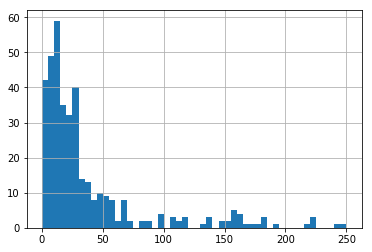

In [27]:
a[a['category'] == 'groceries']['amount'].hist(bins=50)

In [28]:
a[a['category'] == 'misc_shopping']

transactiondate  amount  \
3         2017-09-02    3.25   
17        2017-09-08  182.18   
19        2017-09-08  570.93   
58        2017-09-17  224.00   
63        2017-09-18   36.75   
67        2017-09-18   10.53   
70        2017-09-18  122.50   
128       2017-09-28   59.25   
137       2017-09-29   29.93   
138       2017-09-29   54.95   
139       2017-09-29   23.80   
144       2017-09-30   34.99   
145       2017-09-30   54.98   
191       2017-10-11   40.27   
192       2017-10-11   16.68   
226       2017-10-19   12.23   
285       2017-11-01    2.90   
300       2017-11-04   11.98   
301       2017-11-04   19.20   
361       2017-11-29   17.40   
376       2017-12-02   39.99   
383       2017-12-04    1.99   
394       2017-12-08   18.90   
400       2017-12-12   15.75   
432       2017-12-18   28.99   
461       2017-12-23   28.48   
462       2017-12-23   85.00   
466       2017-12-23   11.15   
470       2017-12-23   41.20   
472       2017-12-24  142.04   
...              ...     ...   
1338      2018-07-25    6.00   
1347      2018-07-27   46.83   
1349      2018-07-27   14.99   
1372      2018-07-31   43.43   
1386      2018-08-02   36.26   
1390      2018-08-03   28.99   
1402      2018-08-05    5.79   
1447      2018-08-10   85.84   
1452      2018-08-11   59.91   
1462      2018-08-13   29.26   
1472      2018-08-15   26.99   
1473      2018-08-15   78.96   
1490      2018-08-18   17.38   
1492      2018-08-18    8.04   
1493      2018-08-18    3.29   
1518      2018-08-27  154.00   
1534      2018-09-01  114.00   
1540      2018-09-01   62.53   
1578      2018-09-07    6.16   
1582      2018-09-08   13.36   
1629      2018-09-21   13.88   
1632      2018-09-21   27.99   
1657      2018-09-30   25.00   
1669      2018-10-03   41.93   
1694      2018-10-09   11.78   
1708      2018-10-11   25.16   
1710      2018-10-11   17.47   
1761      2018-10-31    2.65   
1783      2018-11-04   20.96   
1798      2018-11-07   15.62   

                                            description  exp_inc year_month  \
3     bea   nr:1g9cm6   02.09.17/09.58 hema ev 379 s...  expense    2017-09   
17    sepa ideal                       iban: nl27ing...  expense    2017-09   
19    sepa ideal                       iban: nl21ing...  expense    2017-09   
58    sepa ideal                       iban: nl21ing...  expense    2017-09   
63    bea   nr:mc9908   18.09.17/16.23 hema ev014 hi...  expense    2017-09   
67    bea   nr:gln90x   18.09.17/17.08 etos smk b.v....  expense    2017-09   
70    sepa ideal                       iban: nl27ing...  expense    2017-09   
128   bea   nr:mf4308   28.09.17/14.39 hema baarn ba...  expense    2017-09   
137   sepa ideal                       iban: nl27ing...  expense    2017-09   
138   sepa ideal                       iban: nl21ing...  expense    2017-09   
139   sepa ideal                       iban: nl67ing...  expense    2017-09   
144   sepa ideal                       iban: nl21ing...  expense    2017-09   
145   sepa ideal                       iban: nl27ing...  expense    2017-09   
191   bea   nr:mf4308   11.10.17/17.14 hema baarn ba...  expense    2017-10   
192   bea   nr:yyc98m   11.10.17/17.19 etos 7705 baa...  expense    2017-10   
226   bea   nr:21hs02   19.10.17/16.10 kruidvat 0302...  expense    2017-10   
285   bea   nr:1xng3x   01.11.17/17.34 etos 7596 ams...  expense    2017-11   
300   bea   nr:49rb02   04.11.17/15.06 blokker 0345 ...  expense    2017-11   
301   bea   nr:882t80   04.11.17/15.20 hema ev348 am...  expense    2017-11   
361   sepa ideal                       iban: de80700...  expense    2017-11   
376   sepa ideal                       iban: nl27ing...  expense    2017-12   
383   bea   nr:1xng3x   04.12.17/08.54 etos 7596 ams...  expense    2017-12   
394   bea   nr:73vt09   08.12.17/17.50 hema ev001 ka...  expense    2017-12   
400   bea   nr:th7902   12.12.17/11.21 blokker114 ba...  expense    2017-12   
432   sepa ideal                       iban: 

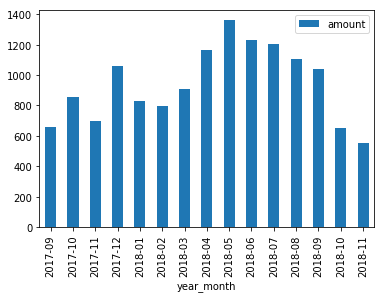

In [29]:
a[a['category'].isin(['groceries'])][['amount', 'category', 'year_month', 'exp_inc']].groupby(['exp_inc', 'category', 'year_month']).sum().reset_index()[['year_month', 'amount']].plot(kind='bar', x='year_month')

In [30]:
a[['exp_inc', 'amount']].groupby('exp_inc').sum()

amount
exp_inc           
expense  112379.21
income   107610.70

In [31]:
a[(a['category'] == 'groceries') & (a['year_month'] == '2018-5')]

Empty DataFrame
Columns: [transactiondate, amount, description, exp_inc, year_month, paid_in_person, paid_online, paid_ideal, cash_withdrawal, transaction_time, transaction_time_hour, day_of_week, month, city, category, group]
Index: []

In [32]:
from collections import Counter

In [33]:
master_word_list = []
for words in a['description']:
    master_word_list.extend(words.split())

In [34]:
x = dict(Counter(master_word_list))

In [35]:
x

{'sepa': 262,
 'incasso': 130,
 'algemeen': 128,
 'doorlopend': 86,
 'incassant:': 87,
 'nl84zzz050695810000': 10,
 'naam:': 262,
 'vitens': 10,
 'nv': 12,
 'machtiging:': 87,
 '000002991568': 10,
 'omschrijving:': 231,
 'factuurnr': 10,
 '07010875': 1,
 '8067': 1,
 'vnklantnr': 9,
 '2002040460': 10,
 'btw': 24,
 '0,60pc': 6,
 '3741': 28,
 'eh': 28,
 '98,': 18,
 'aug': 2,
 'iban:': 230,
 'nl94ingb0000869000': 10,
 'kenmerk:': 155,
 '084602030341': 1,
 'nl43b2c091055420000': 13,
 'nuon': 13,
 'klantenservice': 13,
 'm011000005546270': 13,
 '512607901939': 1,
 '13,36': 10,
 'klantnr': 18,
 '24145549': 9,
 'crn': 19,
 '3013508452': 15,
 'termijn': 19,
 'sep': 3,
 '2017': 8,
 'j.f.': 22,
 'kennedylaan': 18,
 '98': 12,
 'ba': 7,
 'nl54ingb0000000503': 13,
 'ideal': 101,
 'nl51abna0565668625': 8,
 'bic:': 175,
 'abnanl2a': 72,
 'stg': 10,
 'adyen': 13,
 '4415042831727841': 1,
 '0': 24,
 '030002302651398': 1,
 'tw': 6,
 'payment': 10,
 '22021993': 1,
 '2135': 1,
 '001955transferwise': 4,
 '01

In [36]:
budget

category   amount        group
0                      phone    87.00        bills
1              house_cleaner   140.00        bills
2   Credit Card: Capital One     0.00  credit_card
3                       food   110.00         food
4                  groceries   800.00    groceries
5                        gym   100.00        bills
6           health_insurance   240.00        bills
7                   internet    54.49        bills
8                energy_bill   189.00        bills
9                       rent  1964.00         rent
10                     tithe   379.70        bills
11                water_bill    80.82        bills

In [37]:
sofar = a[a['transactiondate'] >= '2018-09-25']
sofar_grouped = sofar.groupby(['category', 'exp_inc'])['amount'].sum().to_frame().reset_index()
sofar_grouped = sofar_grouped.merge(budget.rename(columns={'amount':'budget_amount'}), left_on='category', right_on='category', how='outer')
sofar_grouped.budget_amount = sofar_grouped.budget_amount.fillna(0)
sofar_grouped.amount = sofar_grouped.amount.fillna(0)
sofar_grouped['left_from_budget'] = sofar_grouped['budget_amount'] - sofar_grouped['amount']
sofar_grouped.exp_inc = sofar_grouped.exp_inc.fillna('expense')

In [38]:
# sofar[sofar['category'] == 'unknown'].loc[1665, 'description']

In [39]:
len(sofar[sofar['category'] == 'unknown'])

37

In [40]:
sofar_grouped

category  exp_inc   amount  budget_amount        group  \
0        atm_cash_withdrawal  expense   100.00           0.00          NaN   
1                  bank_fees  expense     3.09           0.00          NaN   
2              child_benefit   income   404.46           0.00          NaN   
3                   clothing  expense    21.13           0.00          NaN   
4           credit_card_bill  expense  2945.18           0.00          NaN   
5                energy_bill  expense   378.56         189.00        bills   
6                       food  expense   531.35         110.00         food   
7                       fuel  expense    79.00           0.00          NaN   
8                  groceries  expense  1469.46         800.00    groceries   
9                        gym  expense   101.00         100.00        bills   
10          health_insurance  expense   482.76         240.00        bills   
11                  internet  expense    54.00          54.49        bills   
12             misc_shopping  expense   160.57           0.00          NaN   
13                     phone  expense   215.89          87.00        bills   
14                      rent  expense  3928.80        1964.00         rent   
15           savings_account  expense   325.00           0.00          NaN   
16           savings_account   income   250.00           0.00          NaN   
17                     train  expense    55.00           0.00          NaN   
18            transportation  expense    20.00           0.00          NaN   
19                   unknown  expense   983.81           0.00          NaN   
20                   unknown   income  3294.71           0.00          NaN   
21                water_bill  expense    56.00          80.82        bills   
22               will_income   income  7922.53           0.00          NaN   
23             house_cleaner  expense     0.00         140.00        bills   
24  Credit Card: Capital One  expense     0.00           0.00  credit_card   
25                     tithe  expense     0.00         379.70        bills   

    left_from_budget  
0            -100.00  
1              -3.09  
2            -404.46  
3             -21.13  
4           -2945.18  
5            -189.56  
6            -421.35  
7             -79.00  
8            -669.46  
9              -1.00  
10           -242.76  
11              0.49  
12           -160.57  
13           -128.89  
14          -1964.80  
15           -325.00  
16           -250.00  
17            -55.00  
18            -20.00  
19           -983.81  
20          -3294.71  
21             24.82  
22          -7922.53  
23            140.00  
24              0.00  
25            379.70

In [41]:
sofar_grouped[sofar_grouped['exp_inc'] == 'expense'].left_from_budget.sum() 


-7765.5900000000011

In [42]:
sofar_grouped[sofar_grouped['exp_inc'] == 'expense'].budget_amount.sum() - 3797

348.01000000000022

In [43]:
sofar.groupby('exp_inc').amount.sum()


exp_inc
expense    11910.6
income     11871.7
Name: amount, dtype: float64

In [44]:
sofar.sort_values('exp_inc', ascending=False)

transactiondate   amount  \
1640      2018-09-25  3797.14   
1801      2018-11-08  1595.62   
1661      2018-10-01   404.46   
1823      2018-11-14   100.00   
1742      2018-10-25  4125.39   
1790      2018-11-06   150.00   
1704      2018-10-11  1699.09   
1768      2018-11-01  1964.40   
1762      2018-10-31     1.20   
1763      2018-10-31    29.25   
1764      2018-11-01   138.00   
1765      2018-11-01    51.28   
1766      2018-11-01   241.38   
1767      2018-11-01     1.50   
1770      2018-11-01     1.50   
1769      2018-11-01    81.00   
1760      2018-10-31     7.23   
1771      2018-11-01     9.90   
1772      2018-11-02    28.00   
1773      2018-11-02    17.57   
1774      2018-11-02     0.50   
1775      2018-11-02     1.00   
1776      2018-11-02   177.26   
1777      2018-11-02    30.10   
1778      2018-11-03     1.96   
1761      2018-10-31     2.65   
1758      2018-10-30    39.05   
1759      2018-10-31     3.00   
1780      2018-11-03    14.85   
1738      2018-10-23    39.90   
...              ...      ...   
1728      2018-10-17    20.00   
1729      2018-10-17     3.09   
1730      2018-10-17     1.00   
1731      2018-10-18     1.50   
1732      2018-10-18     1.50   
1733      2018-10-18     0.70   
1713      2018-10-11    40.55   
1712      2018-10-11    34.80   
1711      2018-10-11     2.00   
1710      2018-10-11    17.47   
1690      2018-10-08    28.15   
1691      2018-10-08     1.00   
1692      2018-10-09     1.50   
1693      2018-10-09    22.05   
1694      2018-10-09    11.78   
1695      2018-10-09    60.00   
1696      2018-10-09    53.65   
1697      2018-10-09     2.59   
1698      2018-10-10    20.00   
1699      2018-10-10     4.86   
1700      2018-10-10    29.80   
1701      2018-10-10    10.00   
1702      2018-10-10     6.75   
1703      2018-10-10    30.13   
1705      2018-10-11    10.00   
1706      2018-10-11    15.00   
1707      2018-10-11     4.15   
1708      2018-10-11    25.16   
1709      2018-10-11  1720.18   
1828      2018-11-14     1.50   

                                            description  exp_inc year_month  \
1640  /trtp/sepa overboeking/iban/nl37deut0265134285...   income     2018-9   
1801  /trtp/sepa overboeking/iban/gb73trwi0099604231...   income    2018-11   
1661  /trtp/sepa overboeking/iban/nl38rabo0317338072...   income    2018-10   
1823  /trtp/sepa overboeking/iban/nl91abna0247286842...   income    2018-11   
1742  /trtp/sepa overboeking/iban/nl37deut0265134285...   income    2018-10   
1790  /trtp/sepa overboeking/iban/nl91abna0247286842...   income    2018-11   
1704  /trtp/sepa overboeking/iban/gb73trwi0099604231...   income    2018-10   
1768  /trtp/sepa incasso algemeen doorlopend/csid/nl...  expense    2018-11   
1762  bea   nr:517f0t   31.10.18/17.41 ah to go a'da...  expense    2018-10   
1763  /trtp/ideal/iban/nl31abna0494688556/bic/abnanl...  expense    2018-10   
1764  /trtp/sepa incasso algemeen doorlopend/csid/nl...  expense    2018-11   
1765  /trtp/sepa incasso algemeen doorlopend/csid/nl...  expense    2018-11   
1766  /trtp/sepa incasso algemeen doorlopend/csid/nl...  expense    2018-11   
1767  bea   nr:2b56r3   01.11.18/09.42 vermaat booki...  expense    2018-11   
1770  bea   nr:82t0zv   01.11.18/19.11 kiosk hlm 400...  expense    2018-11   
1769  bea   nr:k779zt   01.11.18/19.03 amsterdam dan...  expense    2018-11   
1760  bea   nr:95q41n   31.10.18/17.26 albert heijn ...  expense    2018-10   
1771  bea   nr:sds9lg   01.11.18/22.57 bierlokaal de...  expense    2018-11   
1772  /trtp/sepa incasso algemeen doorlopend/csid/nl...  expense    2018-11   
1773  bea   nr:194307   02.11.18/08.03 vomar stephen...  expense    2018-11   
1774  bea   nr:qss4m1   02.11.18/09.38 booking prins...  expense    2018-11   
1775  bea   nr:qss4m1   02.11.18/16.06 booking prins...  expense    2018-11   
1776  bea   nr:7j80w1   02.11.18/18.21 albert heijn ...  expense    2018-11   
1777  /trtp/ideal/iban/nl31abna0494688556/bic/abnanl...  expen

In [45]:
a[(a['transactiondate'] >= '2018-09-25') & (a['category'] == 'food')]

transactiondate  amount  \
1641      2018-09-25    1.00   
1644      2018-09-26    1.50   
1645      2018-09-26    1.00   
1646      2018-09-26   38.00   
1648      2018-09-27    2.40   
1649      2018-09-27    1.00   
1654      2018-09-28    1.50   
1655      2018-09-28    1.50   
1656      2018-09-30   13.60   
1668      2018-10-03    2.20   
1670      2018-10-03    1.25   
1671      2018-10-03   40.05   
1675      2018-10-04    1.95   
1678      2018-10-05    1.00   
1679      2018-10-05   38.05   
1690      2018-10-08   28.15   
1691      2018-10-08    1.00   
1692      2018-10-09    1.50   
1707      2018-10-11    4.15   
1711      2018-10-11    2.00   
1713      2018-10-11   40.55   
1714      2018-10-12    1.50   
1715      2018-10-12    1.00   
1716      2018-10-12    2.60   
1721      2018-10-14    8.00   
1722      2018-10-14    5.75   
1723      2018-10-14    6.40   
1724      2018-10-15   28.25   
1725      2018-10-16    1.50   
1730      2018-10-17    1.00   
...              ...     ...   
1739      2018-10-23    1.50   
1741      2018-10-24    7.00   
1743      2018-10-25    1.50   
1745      2018-10-25   32.00   
1757      2018-10-30    1.00   
1758      2018-10-30   39.05   
1759      2018-10-31    3.00   
1762      2018-10-31    1.20   
1763      2018-10-31   29.25   
1767      2018-11-01    1.50   
1770      2018-11-01    1.50   
1774      2018-11-02    0.50   
1775      2018-11-02    1.00   
1777      2018-11-02   30.10   
1791      2018-11-06   10.45   
1793      2018-11-06    4.15   
1796      2018-11-07    1.50   
1799      2018-11-07    1.00   
1804      2018-11-08    0.50   
1805      2018-11-08    1.00   
1806      2018-11-08   24.70   
1807      2018-11-09    1.50   
1808      2018-11-09    0.50   
1809      2018-11-09    1.10   
1816      2018-11-11   10.60   
1817      2018-11-12    0.50   
1818      2018-11-12    0.50   
1819      2018-11-12   34.05   
1825      2018-11-14    4.15   
1828      2018-11-14    1.50   

                                            description  exp_inc year_month  \
1641  bea   nr:146b4l   25.09.18/18.02 kiosk asd 291...  expense     2018-9   
1644  bea   nr:qss4m1   26.09.18/08.58 booking prins...  expense     2018-9   
1645  bea   nr:9v1h76   26.09.18/17.44 broodzaak asd...  expense     2018-9   
1646  /trtp/ideal/iban/nl31abna0494688556/bic/abnanl...  expense     2018-9   
1648  bea   nr:82jy01   27.09.18/08.43 8304 had kios...  expense     2018-9   
1649  bea   nr:qss4m1   27.09.18/09.35 booking prins...  expense     2018-9   
1654  bea   nr:qss4m1   28.09.18/09.14 booking prins...  expense     2018-9   
1655  bea   nr:2b56r3   28.09.18/16.38 vermaat booki...  expense     2018-9   
1656  bea   nr:4zhk56   30.09.18/09.59 de buurtbakke...  expense     2018-9   
1668  bea   nr:82t0zv   03.10.18/08.57 kiosk hlm 400...  expense    2018-10   
1670  bea   nr:4b1wf1   03.10.18/18.12 broodzaak asd...  expense    2018-10   
1671  /trtp/ideal/iban/nl31abna0494688556/bic/abnanl...  expense    2018-10   
1675  bea   nr:9v1h76   04.10.18/18.22 broodzaak asd...  expense    2018-10   
1678  bea   nr:x2sxw5   05.10.18/16.55 kiosk asd 291...  expense    2018-10   
1679  /trtp/ideal/iban/nl31abna0494688556/bic/abnanl...  expense    2018-10   
1690  /trtp/ideal/iban/nl31abna0494688556/bic/abnanl...  expense    2018-10   
1691  bea   nr:7hx3dz   08.10.18/18.12 broodzaak asd...  expense    2018-10   
1692  bea   nr:qss4m1   09.10.18/09.15 booking prins...  expense    2018-10   
1707  bea   nr:82jy01   11.10.18/08.58 8304 had kios...  expense    2018-10   
1711  bea   nr:qss4m1   11.10.18/17.17 booking prins...  expense    2018-10   
1713  /trtp/ideal/iban/nl31abna0494688556/bic/abnanl...  expense    2018-10   
1714  bea   nr:qss4m1   12.10.18/08.57 booking prins...  expense    2018-10   
1715  bea   nr:qss4m1   12.10.18/15.38 booking prins...  expense    2018-10   
1716  bea   nr:zfx715   12.10.18/17.39 smullers asd ...  expense    2018-10   
1721  bea   nr:r2zg6v   14.10.18/15.05 smulle

In [46]:
a[a['category'] == 'water_bill'].loc[1435, 'description']

'sepa incasso algemeen doorlopend incassant: nl84zzz050695810000  naam: vitens nv                  machtiging: 000002991568        omschrijving: factuurnr 08470045 1663 afklantnr 2002040460 btw 4,57pc 3741 eh 98, 28.07.2018      iban: nl94ingb0000869000        kenmerk: 096602566372'

In [50]:
groups = a['group'].drop_duplicates().tolist()

In [51]:
groups

['bills',
 'transfer_wise',
 'shopping/entertainment',
 'transportation',
 'groceries',
 'food',
 'unknown',
 'will_income',
 'rent',
 'atm_cash_withdrawal',
 'other',
 'travel',
 'bank_fees',
 'credit_card_bill',
 'savings_account',
 'gym',
 'child_benefit']

In [71]:
group_by_month = a.groupby(['group', 'year_month']).amount.sum().reset_index()

In [72]:
group_by_month

group year_month   amount
0    atm_cash_withdrawal    2017-10   520.00
1    atm_cash_withdrawal    2017-12  1820.00
2    atm_cash_withdrawal    2018-01  1320.00
3    atm_cash_withdrawal    2018-02   120.00
4    atm_cash_withdrawal    2018-03   200.00
5    atm_cash_withdrawal    2018-04   140.00
6    atm_cash_withdrawal    2018-05   100.00
7    atm_cash_withdrawal    2018-06   230.00
8    atm_cash_withdrawal    2018-07   300.00
9    atm_cash_withdrawal    2018-08  1060.00
10   atm_cash_withdrawal    2018-10   100.00
11             bank_fees    2017-10     2.66
12             bank_fees    2017-11     2.66
13             bank_fees    2017-12     2.66
14             bank_fees    2018-01     2.66
15             bank_fees    2018-02     2.66
16             bank_fees    2018-03     2.66
17             bank_fees    2018-04     2.66
18             bank_fees    2018-05     2.66
19             bank_fees    2018-06     2.66
20             bank_fees    2018-07     3.09
21             bank_fees    2018-08     3.09
22             bank_fees    2018-09     3.09
23             bank_fees    2018-10     3.09
24                 bills    2017-09   264.19
25                 bills    2017-10   212.94
26                 bills    2017-11   291.76
27                 bills    2017-12   825.45
28                 bills    2018-01   485.53
29                 bills    2018-02   412.22
..                   ...        ...      ...
160               travel    2018-09   517.90
161              unknown    2017-09  1477.16
162              unknown    2017-10   145.51
163              unknown    2017-11   102.69
164              unknown    2017-12   461.37
165              unknown    2018-01    66.95
166              unknown    2018-02   418.23
167              unknown    2018-03   625.18
168              unknown    2018-04   203.14
169              unknown    2018-05   370.35
170              unknown    2018-06   476.02
171              unknown    2018-07  1511.18
172              unknown    2018-08  1130.93
173              unknown    2018-09   803.60
174              unknown    2018-10  2309.69
175              unknown    2018-11  1968.83
176          will_income    2017-09  3815.72
177          will_income    2017-10  3894.23
178          will_income    2017-11  3326.98
179          will_income    2017-12  4101.55
180          will_income    2018-01  3669.33
181          will_income    2018-02  7474.00
182          will_income    2018-03  3797.14
183          will_income    2018-04  3797.14
184          will_income    2018-05  3986.64
185          will_income    2018-06  9219.14
186          will_income    2018-07  3797.14
187          will_income    2018-08  3797.14
188          will_income    2018-09  3875.64
189          will_income    2018-10  4125.39

[190 rows x 3 columns]

In [57]:
a.plot()

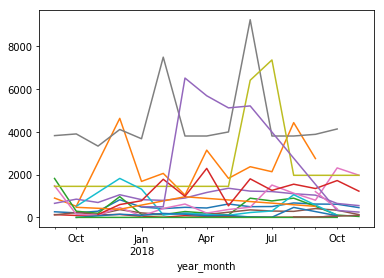

In [69]:
a
for group in groups:
    a[a['group'] == group].groupby('year_month').amount.sum().plot(kind='line')

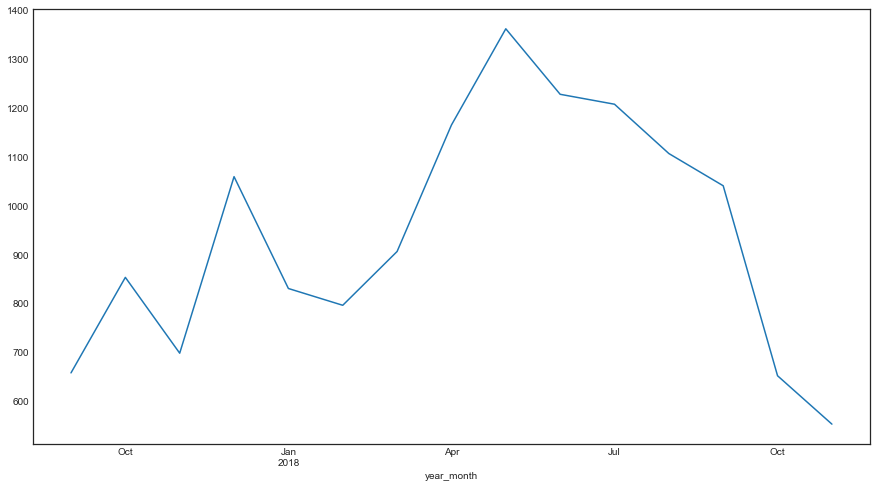

In [96]:
a[a['group'] == 'groceries'].groupby('year_month').amount.sum().plot(kind='line', figsize=(15, 8))

In [89]:
groups

['bills',
 'transfer_wise',
 'shopping/entertainment',
 'transportation',
 'groceries',
 'food',
 'unknown',
 'will_income',
 'rent',
 'atm_cash_withdrawal',
 'other',
 'travel',
 'bank_fees',
 'credit_card_bill',
 'savings_account',
 'gym',
 'child_benefit']

In [44]:
budget

category   amount        group
0                      phone    87.00        bills
1              house_cleaner   140.00        bills
2   Credit Card: Capital One     0.00  credit_card
3                       food   110.00         food
4                  groceries   800.00    groceries
5                        gym   100.00        bills
6           health_insurance   240.00        bills
7                   internet    54.49        bills
8                energy_bill   189.00        bills
9                       rent  1964.00         rent
10                     tithe   379.70        bills
11                water_bill    80.82        bills

In [50]:
a[a['category'] == 'gym']

transactiondate  amount  \
1514      2018-08-26   19.90   
1600      2018-09-12    8.45   
1601      2018-09-12    6.80   
1605      2018-09-14    0.65   
1606      2018-09-14    0.65   
1785      2018-11-06   41.50   
1786      2018-11-06   51.50   
1787      2018-11-06    4.00   
1788      2018-11-06    4.00   

                                            description  exp_inc year_month  \
1514  bea   nr:yu7601   26.08.18/12.44 life fit cent...  expense    2018-08   
1600  /trtp/sepa incasso algemeen doorlopend/csid/nl...  expense    2018-09   
1601  /trtp/sepa incasso algemeen doorlopend/csid/nl...  expense    2018-09   
1605  /trtp/sepa incasso algemeen doorlopend/csid/nl...  expense    2018-09   
1606  /trtp/sepa incasso algemeen doorlopend/csid/nl...  expense    2018-09   
1785  /trtp/sepa incasso algemeen doorlopend/csid/nl...  expense    2018-11   
1786  /trtp/sepa incasso algemeen doorlopend/csid/nl...  expense    2018-11   
1787  /trtp/sepa incasso algemeen doorlopend/csid/nl...  expense    2018-11   
1788  /trtp/sepa incasso algemeen doorlopend/csid/nl...  expense    2018-11   

      paid_in_person  paid_online  paid_ideal  cash_withdrawal  \
1514               1            0           0                0   
1600               0            1           0                0   
1601               0            1           0                0   
1605               0            1           0                0   
1606               0            1           0                0   
1785               0            1           0                0   
1786               0            1           0                0   
1787               0            1           0                0   
1788               0            1           0                0   

      transaction_time  transaction_time_hour  day_of_week  month     city  \
1514             12.44                   12.0            6      8  haarlem   
1600              0.00                    0.0            2      9     None   
1601              0.00                    0.0            2      9     None   
1605              0.00                    0.0            4      9     None   
1606              0.00                    0.0            4      9     None   
1785              0.00                    0.0            1     11     None   
1786              0.00                    0.0            1     11     None   
1787              0.00                    0.0            1     11     None   
1788              0.00                    0.0            1     11     None   

     category group  
1514      gym   gym  
1600      gym   gym  
1601      gym   gym  
1605      gym   gym  
1606      gym   gym  
1785      gym   gym  
1786      gym   gym  
1787      gym   gym  
1788      gym   gym